In [1]:
import pandas as pd
from optimalcodon.projects.rnastability.predictdecay import predict_sequence
import joblib
import matplotlib.pyplot as plt

In [2]:
data_fi3bcd_wu_et_al = {
    'seqs': [
        'atggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGCGCCACCAGTCCTTCTGCGACGAGGTCTTCGTCTGCTCCGACGAGCTCAAGGTCGAACTCTCCAAGTGCCCCTGCAAGTACATCTCCCCCCACAACCCCGAACCCCAGACGCTCACGTACAACAAGCGCGTCGACAACCTCCGCATCCAGTTCCAGCGCTTCACGATCATCACGGACAACTACCACTACCACCGCGAATCCCACGACCACACGAAGGTCCTCGACCTCGTCAACTTCGAGATCGACGAAACGCAGTCCGACAACTGCAAGCAGCACTGCTACATCCAGCGCTCCTACGTCCGCATCAACGAGTCCAAGAACCCCCGCCCCACGATCTTCTTCTACTTCCCCCACTGCCTCGTCCCCCAGACGTGCTACAAGCTCCGCACGTGCTTCTGCGACGACGAGGTCCCCGAAGTCTCCAAGTGCGTCCCCTACCCCTGCATCTCCAACGACCAGCTCCACAAGCGCACGCTCTACGACCACCACTTCGAAATCCACTACCCCCAGAACGTCTACACGGAGAAGCAGAAGTCCCGCCAGAACATCTTCCGCACGCTCATCTCCTTCCTCAACCGCGACAAGACGCAGAACGTCAACCGCGAACGCTGCAACAACCACTCCCAGCCCCCCAAGGAGAAGGACGAACTCCACCCCCCCTTCATCTACATCACGTCCTGCTTCCTCAAGTACCGCCACGAGTTCGACTGCTGCTTCCAGGACATCCAGCTCATCCACGTCTCTAGAGATTACAAAGATGACGACGATAAATGA',
        'AtggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACcagTCCTTCTGCGACGAGGTAttcGTCTGCAGTgacGAGCTCAAAGTCGAACTCTCCaagTGTCCCtgcAAGTATATCtccCCACACAACCCCGAAcccCAAACGctcACGTACAACAAGAGAgtcGACAATctcCGCATACAGttcCAGCGCTTCACAATCatcACAGATAATTACcacTATcacAGAGAATCCCACgacCATACGaagGTActcGACCTCGTCAACTTTGAGATCgacGAAACGCAAtccGACAATtgcAAGCAGCATTGCtacATACAGCGCtccTATGTCcgcATAAACGAGTCCAAGaacCCACGCCCCacgATCTTTTTCTACTTCcccCACTGTCTCgtcCCCCAAacgTGCTACAAActcAGAACGtgcTTTtgcGATGACGAGgtcCCCGAAGTAtccAAATGCgtcCCCtacCCATGCATCTCCaacGACCAGCTCCATAAGcgcACActcTACGATCACcacTTCGAAATCCACTACCCAcagAATGTCtacACGGAGAAGCAAaagAGTCGCCAGAACatcTTTCGCacgCTCATATCCTTCctcAACAGAGACaagACGCAAaacGTCAATcgcGAACGCTGTAACAACCACtccCAACCACCCAAAGAGAAGgacGAATTACACcccCCCTTTATCtacATAacgTCCTGCTTCCTCAAGTACCGCCATGAGTTCgacTGCTGTttcCAGGACATCCAGCTCATAcacGTATCTAGAGATTACAAAGATGACGACGATAAATGA',
        'AtggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACCAATCCTTCTGCGACGAGGTATTTGTCTGCAGTGATGAGCTCAAAGTCGAACTCTCCAAATGTCCCTGTAAGTATATCAGTCCACACAACCCCGAACCACAAACGTTAACGTACAACAAGAGAGTAGACAATTTACGCATACAGTTTCAGCGCTTCACAATCATAACAGATAATTACCATTATCATAGAGAATCCCACGATCATACGAAAGTATTAGACCTCGTCAACTTTGAGATCGATGAAACGCAAAGTGACAATTGTAAGCAGCATTGCTATATACAGCGCAGTTATGTCAGAATAAACGAGTCCAAGAATCCACGCCCCACAATCTTTTTCTACTTCCCACACTGTCTCGTACCCCAAACATGCTACAAATTAAGAACGTGTTTTTGTGATGACGAGGTACCCGAAGTAAGTAAATGCGTCCCCTATCCATGCATCTCCAATGACCAGCTCCATAAGAGAACATTATACGATCACCATTTCGAAATCCACTACCCACAAAATGTCTATACGGAGAAGCAAAAAAGTCGCCAGAACATATTTCGCACACTCATATCCTTCTTAAACAGAGACAAAACGCAAAATGTCAATAGAGAACGCTGTAACAACCACAGTCAACCACCCAAAGAGAAGGATGAATTACACCCACCCTTTATCTATATAACATCCTGCTTCCTCAAGTACCGCCATGAGTTCGATTGCTGTTTTCAGGACATCCAGCTCATACATGTATCTAGAGATTACAAAGATGACGACGATAAATGA',
        'atggtttcaaaaggagaagaagataatatggcgataattaaagaatttatgaggtttaaagttcatatggaagggtcagttaatgggcatgaatttgaaatagaaggagaaggagaagggagaccatacgaagggacacaaacagctaaacttaaagttacaaaaggaggaccacttccatttgcatgggatatactttcaccacaatttatgtacgggtcaaaagcttacgttaaacatccagctgatataccagattaccttaaactttcatttccagaagggtttaaatgggaaagggttatgaattttgaagatggaggagttgttacagttacacaagattcatcacttcaagatggagaatttatatacaaagttaaacttagagggacaaattttccatcagatgggccagttatgcaaaaaaaaacaatgggatgggaagcgtcatcagaaaggatgtacccagaagatggggcacttaaaggggaaattaaacaaaggcttaaacttaaagatggagggcattacgatgctgaagttaaaacaacatacaaagctaaaaaaccagttcaacttccaggggcatacaatgttaatattaaacttgatataacatcacataatgaagattacacaatagttgaacaatacgaaagggcagaagggaggcattcaacaggagggatggatgaactttacaaaGGAAGCGGAGCTACTAACTTCAGCCTGCTGAAGCAGGCTGGAGACGTGGAGGAGAACCCTGGACCTCTCGAGAGACACCAAagtTTCtgtGACgaaGTATTTGTCtgtAGTGATGAGttaAAAGTCGAACTCagtAAATGTCCCTGTaaaTATATCAGTCCAcatAACccaGAACCACAAacaTTAACGtatAACaaaAGAGTAGACAATTTAagaATACAGTTTCAGagaTTCACAataATAACAGATAATTACCATTATCATAGAGAATCCcatGATCATACGAAAGTATTAgatCTCGTCAACTTTgaaATCGATGAAACGCAAAGTgatAATTGTAAGcaaCATTGCTATATAcaaCGCAGTTATgtaAGAATAAACgaaTCCaaaAATCCACGCccaACAATCTTTtttTACtttCCACACTGTttaGTACCCCAAACAtgtTACAAATTAAGAacaTGTTTTTGTGATGACgaaGTACCCGAAGTAAGTAAATGCgtaCCCTATCCAtgtATCagtAATGACcaaCTCCATaaaAGAACATTATACGATcatCATTTCGAAataCACtatCCACAAAATGTCTATacaGAGaaaCAAAAAAGTCGCcaaAACATATTTCGCACAttaATATCCtttTTAAACAGAgatAAAACGCAAAATgtaAATAGAGAAagaTGTAACaatCACAGTCAACCAccaAAAGAGaaaGATGAATTAcatCCACCCTTTataTATATAACATCCtgtTTCttaAAGTACCGCCATgaaTTCGATtgtTGTTTTCAGgatATCcaaCTCATACATGTATCTAGAGATTACAAAGATGACGACGATAAATGA'
    ],
    'p_optimal': [100, 75, 50, 25]

}

data_fi3bcd_wu_et_al = pd.DataFrame(data_fi3bcd_wu_et_al)
data_fi3bcd_wu_et_al['seqs'] = data_fi3bcd_wu_et_al.seqs.str.upper()
data_fi3bcd_wu_et_al

,p_optimal,seqs
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...


In [3]:
mdl_path = '../19-04-30-PredictiveModelDecayAllSpecies/19-05-01-TrainModels/results_data/final_model_gbm.joblib'
mdl = joblib.load(mdl_path)
mdl_params = {'specie': 'human', 'cell_type': '293t',
              'datatype': 'slam-seq'}

In [4]:
data_fi3bcd_wu_et_al['predicted_stability'] = data_fi3bcd_wu_et_al.seqs.apply(predict_sequence, mdl=mdl, **mdl_params)

In [5]:
data_fi3bcd_wu_et_al

,p_optimal,seqs,predicted_stability
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.275257
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.415763
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.518684
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.574982


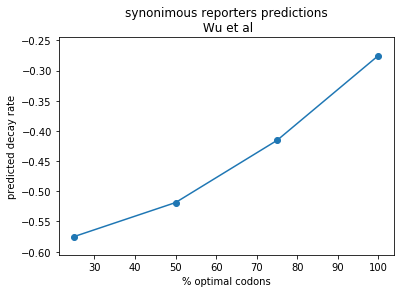

In [6]:
plt.scatter(data_fi3bcd_wu_et_al.p_optimal, data_fi3bcd_wu_et_al.predicted_stability)
plt.plot(data_fi3bcd_wu_et_al.p_optimal, data_fi3bcd_wu_et_al.predicted_stability)
plt.xlabel('% optimal codons')
plt.ylabel('predicted decay rate')
plt.title('synonimous reporters predictions\n Wu et al')
plt.savefig('synonimus_reporters_wu_et_al.pdf');

In [13]:
## load experimental validation result
experiments = pd.read_excel("silent_reporter_q_experiment_quants.xlsx")
experiments.head()
experiments['p_optimal'] = [100, 75, 50, 25]
experiments.index = range(4)
experiments

,RNA,protein,p_optimal
0,1.00,1.699052,100
1,0.84,0.774905,75
2,0.67,0.335277,50
3,0.25,0.191280,25


In [15]:
results = pd.merge(data_fi3bcd_wu_et_al, experiments, on='p_optimal')

In [16]:
results

,p_optimal,seqs,predicted_stability,RNA,protein
0,100,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.275257,1.00,1.699052
1,75,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.415763,0.84,0.774905
2,50,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.518684,0.67,0.335277
3,25,ATGGTTTCAAAAGGAGAAGAAGATAATATGGCGATAATTAAAGAAT...,-0.574982,0.25,0.191280


In [22]:
results.to_csv("results_data/predict_silent_reporters.csv", index=False)